# 딥러닝 - 분류

### 아이리스 품종 예측  
- 데이타 셋 : ./dataset/iris.csv<br>
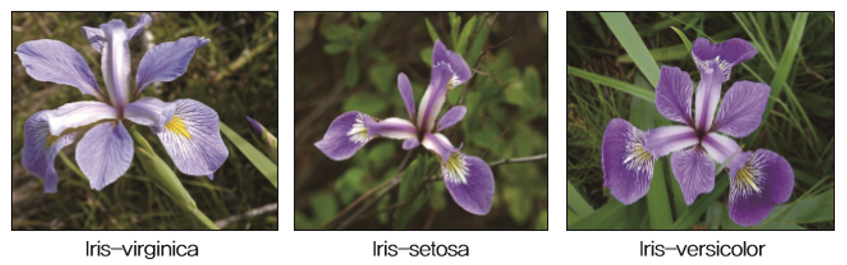

- 아이리스는 꽃잎의 모양과 길이에 따라 여러 가지 품종으로 나뉨
- 딥러닝을 사용하여 아이리스의 품종을 구별해 낼 수 있을까?
- 아이리스 품종이 3개의 품종으로 구분되야 하므로 이항 분류가 아니라 다중 분류 사용

### 아이리스 데이타 셋
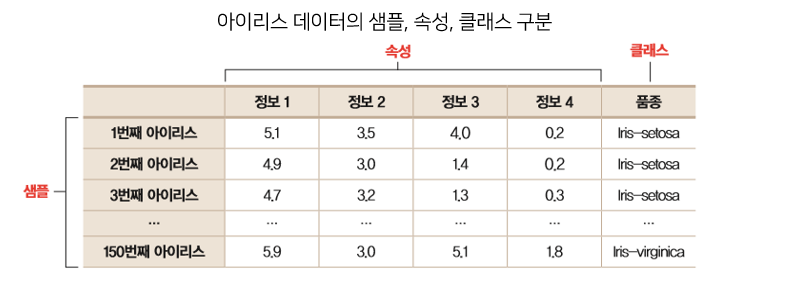

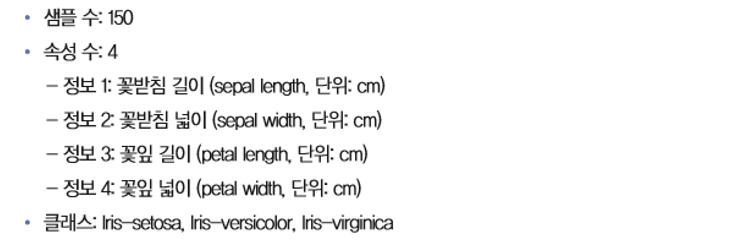

### 이항 분류와 다중 분류
- 여러 개의 답 중 하나를 고르는 분류 문제를 다중 분류(multi classification) 라고 함
- 다중 분류 문제는 둘 중에 하나를 고르는 이항 분류(binary classification)와는 접근 방식이 조금 다름

### 1. 데이타 불러오기 

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

In [ ]:
import pandas as pd

df = pd.read_csv('iris.csv', 
                 names = ["sepal_length", "sepal_width", 
                          "petal_length", "petal_width", "species"])

In [ ]:
df.tail(5)

In [ ]:
df.info()

In [ ]:
df.describe()

### 2. 케라스를 이용하여 아이리스 품종 예측

### 1) pandas를 이용하여 속성과 클래스 구분
- 데이타 안에 문자열이 포함('Iris-setosa', 'Iris-versicolor', 'Iris-virginica' 등)되어 있으면 numpy보다 pandas에서 처리가 바람직 

In [ ]:
import pandas as pd

df = pd.read_csv('iris.csv', 
                 names = ["sepal_length", "sepal_width", 
                          "petal_length", "petal_width", "species"])

dataset = df.values
X = dataset[:,0:4].astype(float) # 속성
y = dataset[:,4]                 # 클래스

### 2) 클래스의 문자열을 원핫 인코딩(one-hot encoding)을 이용하여 변환
- 1) sklearn 라이브러리의 LabelEncoder() : 문자열을 숫자로 변환
- 2) keras.util의 np_utils.categorical() : 숫자를 0과 1로만 이루어진 형태로 바꿔주는 함수 

In [ ]:
# 문자열을 숫자로 변환
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf

# 1) sklearn 라이브러리의 LabelEncoder() 


# 2) keras.util의 np_utils.categorical() 함수


In [ ]:
y

### 3) 모델의 설정
- 최종 출력 값이 3개 중 하나여야 하므로 출력층에 해당하는 Dense의 노드 수를 3으로 설정함
- 활성화 함수로 소프트맥스(softmax)를 사용

In [ ]:
# 모델의 설정
from tensorflow.keras.models import Sequential




### 소프트맥스(softmax) 활성화 함수
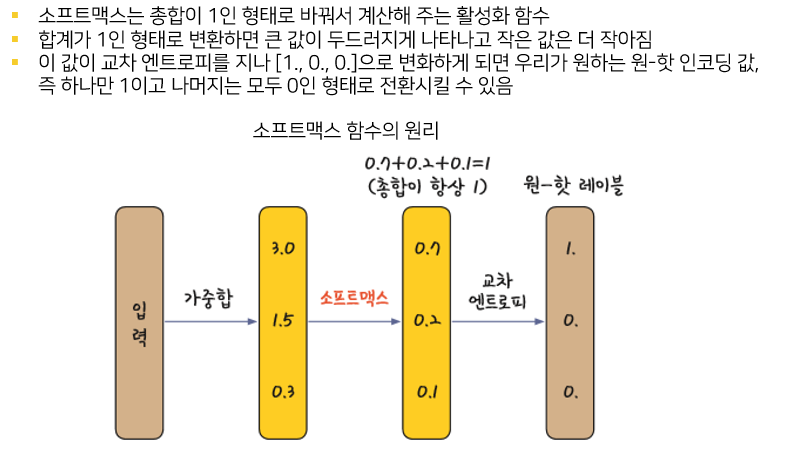

### 4) 컴파일 및 실행
- 다중 분류에 적절한 오차 함수인 categorical_crossentropy를 사용
- 최적화 함수로 adam 사용
- 전체 샘플이 50회 반복될 때까지 실험을 진행하되 한 번에 입력되는 값은 1개

In [ ]:
# 모델 컴파일


# 모델 실행


# 결과 출력


### 결과 해석
- 예측 정확도가 97.33%로 측정됨
- 150개의 샘플을 한 번씩 테스트한 결과 146개의 품종을 정확히 맞추는 확률

In [ ]:
150*0.9733

### 새로운 데이타로 예측하기

In [ ]:
X[0]

In [ ]:
pred = model.predict([[5.1, 3.5, 1.4, 0.2]])
pred

In [ ]:
import numpy as np

idx = np.argmax(pred)
print(idx, round(pred[0][idx]*100, 2))